# 1. Import Libraries and Setup


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras import layers
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import os
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
print(f"TensorFlow Version: {tf.__version__}\n")


TensorFlow Version: 2.18.0



In [3]:
# Download NLTK resources
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# 2. Load and Preprocess Data

In [5]:
from google.colab import files

uploaded = files.upload()


Saving Amazon Product Reviews Datasets.csv to Amazon Product Reviews Datasets.csv


In [6]:
df = pd.read_csv("Amazon Product Reviews Datasets.csv")
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


# 3.Exploratory Data Analysis (EDA)

In [7]:
# Filtering Columns
# Keep only relevant columns
df = df[['reviews.title' , 'reviews.text' , 'reviews.rating']]
df.head(20)


,reviews.title,reviews.text,reviews.rating
0,"Paperwhite voyage, no regrets!",I initially had trouble deciding between the p...,5.0
1,One Simply Could Not Ask For More,Allow me to preface this with a little history...,5.0
2,Great for those that just want an e-reader,I am enjoying it so far. Great for reading. Ha...,4.0
3,Love / Hate relationship,I bought one of the first Paperwhites and have...,5.0
4,I LOVE IT,I have to say upfront - I don't like coroporat...,5.0
5,Great device for reading. 8 people found this ...,"My previous kindle was a DX, this is my second...",NaN
6,One Simply Could Not Ask For More 28 people fo...,Allow me to preface this with a little history...,NaN
7,Definitely better than the previous generation...,Just got mine right now. Looks the same as the...,NaN
8,"Paperwhite voyage, no regrets! 16 people found...",I initially had trouble deciding between the p...,NaN
9,Great for those that just want an e-reader 19 ...,I am enjoying it so far. Great for reading. Ha...,NaN


In [8]:
# Basic info about the dataset
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.title   1580 non-null   object 
 1   reviews.text    1597 non-null   object 
 2   reviews.rating  1177 non-null   float64
dtypes: float64(1), object(2)
memory usage: 37.6+ KB
None


In [9]:
# Label Mapping
#Convert numerical ratings to sentiment labels (0: Negative, 1: Neutral, 2: Positive).
df['sent_score'] = df['reviews.rating'].map({1: 0, 2: 0, 3: 1, 4: 2, 5: 2})
df['sentiment'] = df['sent_score'].map({0: 'NEGATIVE',1: 'NEUTRAL',2: 'POSITIVE'})

df.head(20)


,reviews.title,reviews.text,reviews.rating,sent_score,sentiment
0,"Paperwhite voyage, no regrets!",I initially had trouble deciding between the p...,5.0,2.0,POSITIVE
1,One Simply Could Not Ask For More,Allow me to preface this with a little history...,5.0,2.0,POSITIVE
2,Great for those that just want an e-reader,I am enjoying it so far. Great for reading. Ha...,4.0,2.0,POSITIVE
3,Love / Hate relationship,I bought one of the first Paperwhites and have...,5.0,2.0,POSITIVE
4,I LOVE IT,I have to say upfront - I don't like coroporat...,5.0,2.0,POSITIVE
5,Great device for reading. 8 people found this ...,"My previous kindle was a DX, this is my second...",NaN,NaN,NaN
6,One Simply Could Not Ask For More 28 people fo...,Allow me to preface this with a little history...,NaN,NaN,NaN
7,Definitely better than the previous generation...,Just got mine right now. Looks the same as the...,NaN,NaN,NaN
8,"Paperwhite voyage, no regrets! 16 people found...",I initially had trouble deciding between the p...,NaN,NaN,NaN
9,Great for those that just want an e-reader 19 ...,I am enjoying it so far. Great for reading. Ha...,NaN,NaN,NaN


In [10]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.title   1580 non-null   object 
 1   reviews.text    1597 non-null   object 
 2   reviews.rating  1177 non-null   float64
 3   sent_score      1177 non-null   float64
 4   sentiment       1177 non-null   object 
dtypes: float64(2), object(3)
memory usage: 62.5+ KB
None


In [11]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
reviews.title      17
reviews.text        0
reviews.rating    420
sent_score        420
sentiment         420
dtype: int64


In [12]:
# Drop any rows that contain missing values to clean the dataset
df = df.dropna()

In [13]:
# Check for missing values after drop all Nan and missing values
df.isnull().sum()

,0
reviews.title,0
reviews.text,0
reviews.rating,0
sent_score,0
sentiment,0


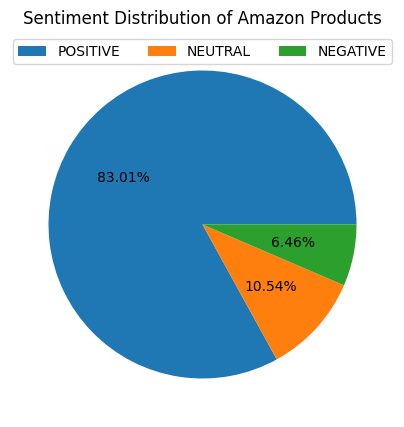

In [14]:
# Analyzing Data Distribution
plt.figure(figsize = (5,5))

labels = ['POSITIVE','NEUTRAL','NEGATIVE']
plt.pie(df['sentiment'].value_counts(),autopct='%0.2f%%')
plt.legend(labels, ncol=3, loc=9)
plt.title("Sentiment Distribution of Amazon Products")
plt.show()

In [15]:
# We'll only need the review title, text and sentiment for training and testing
df = df.drop(['reviews.rating', 'sent_score'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1177 entries, 0 to 1596
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviews.title  1177 non-null   object
 1   reviews.text   1177 non-null   object
 2   sentiment      1177 non-null   object
dtypes: object(3)
memory usage: 36.8+ KB


In [16]:
df.head(20)

,reviews.title,reviews.text,sentiment
0,"Paperwhite voyage, no regrets!",I initially had trouble deciding between the p...,POSITIVE
1,One Simply Could Not Ask For More,Allow me to preface this with a little history...,POSITIVE
2,Great for those that just want an e-reader,I am enjoying it so far. Great for reading. Ha...,POSITIVE
3,Love / Hate relationship,I bought one of the first Paperwhites and have...,POSITIVE
4,I LOVE IT,I have to say upfront - I don't like coroporat...,POSITIVE
13,Liked the smaller size,"Had older model, that you could text to speech...",POSITIVE
14,Superb reading device - but which one's best f...,This is a review of the Kindle Paperwhite laun...,POSITIVE
15,I love it!,I love my kindle! I got one for my fiance on h...,POSITIVE
16,Un plaisir,"Vraiment bon petit appareil , lger et facile d...",POSITIVE
17,Works great and I love the built-in light,Exactly what it is supposed to be. Works great...,POSITIVE


In [17]:
# Check for duplicates
print("\nDuplicate Reviews:")
print(df.duplicated(subset=['reviews.text']).sum())
print(df.duplicated(subset=['reviews.title']).sum())


Duplicate Reviews:
269
227


In [18]:
# Remove duplicates
df = df.drop_duplicates(['reviews.text'])
df = df.drop_duplicates(['reviews.title'])

In [19]:
# Check for duplicates
print("\nDuplicate Reviews:")
print(df.duplicated(subset=['reviews.text']).sum())
print(df.duplicated(subset=['reviews.title']).sum())


Duplicate Reviews:
0
0


In [20]:
df.shape

(791, 3)

In [21]:
def clean_text(text):
    if not isinstance(text, str):  # Handle non-string entries
        text = str(text)
    stop_words = set(stopwords.words('english'))
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

In [22]:
df['reviews.text'][0]

"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about cu

In [23]:
# Clean text
df['reviews.text'] = df['reviews.text'].apply(clean_text)
df['reviews.title'] = df['reviews.title'].apply(clean_text)

In [24]:
df['reviews.text'][0]

'initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyagefortunately friends owned ended buying paperwhite basis models ppi dollar jump turns pricey voyages page press isnt always sensitive fine specific setting dont need auto light adjustmentits week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either youll changing light level certain time day every readingalso glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service'

In [25]:
# Save cleaned dataset
df.to_csv('cleaned_amazon_reviews.csv', index=False)
print("Cleaned dataset saved to 'cleaned_amazon_reviews.csv'")

Cleaned dataset saved to 'cleaned_amazon_reviews.csv'


# 4. Prepare Data for BERT

In [26]:
# Loading BERT Model and Tokenizer
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
for layer in bert_model.layers:
    layer.trainable = True

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [27]:
# Custom BERT Layer to extract CLS token
class Bert_layers(layers.Layer):
    def __init__(self, bert_mod):
        super(Bert_layers, self).__init__()
        self.bert = bert_mod

    def call(self, inputs):
        input_ids, attention_mask = inputs
        bert_out = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_token = bert_out.last_hidden_state[:, 0, :]  # CLS token
        return cls_token

# 5. Define Model

In [28]:
input_ids = layers.Input(shape=(256,), dtype=tf.int32, name="input_ids")
attention_mask = layers.Input(shape=(256,), dtype=tf.int32, name="attention_mask")

In [29]:
#Pass Through BERT Layer
cls_token = Bert_layers(bert_model)([input_ids, attention_mask])

In [30]:
# Classification Head as Sequential Model
classifier_head = tf.keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Dense(3, activation='softmax')  # 3 classes
], name="classifier_head")


# Apply classifier head to CLS token
output = classifier_head(cls_token)

In [31]:
# Build and Compile Final Model
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

optimizer = Adam(learning_rate=3e-5)
loss = SparseCategoricalCrossentropy(from_logits=False)
metrics = [SparseCategoricalAccuracy()]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [32]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layers         │ (None, 768)       │          0 │ input_ids[0][0],  │
│ (Bert_layers)       │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classifier_head     │ (None, 3)         │    528,899 │ bert_layers[0][0] │
│ (Sequential)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 528,899 (2.02 MB)

 Trainable params: 527,363 (2.01 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [33]:
# Tokenize Reviews Function
def encode_reviews(reviews):
    """Tokenizes a list of texts using the BERT tokenizer."""
    tokens = bert_tokenizer(
        reviews.tolist(),
        max_length=128,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )
    return tokens['input_ids'], tokens['attention_mask']

In [34]:
# Tokenize Title and Text
x_title_ids, x_title_mask = encode_reviews(df['reviews.title'])
x_text_ids, x_text_mask = encode_reviews(df['reviews.text'])


In [35]:
# Combine title and text tokens
input_ids = tf.concat([x_title_ids, x_text_ids], axis=1).numpy()
attention_mask = tf.concat([x_title_mask, x_text_mask], axis=1).numpy()

In [36]:
# Encode Labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])

In [37]:
# Train/Test Split
xtr_ids, xts_ids, xtr_mask, xts_mask, ytr, yts = train_test_split(
    input_ids, attention_mask, y, test_size=0.2, random_state=42
)

In [38]:
# Convert to TensorFlow tensors
xtr_ids = tf.convert_to_tensor(xtr_ids)
xts_ids = tf.convert_to_tensor(xts_ids)
xtr_mask = tf.convert_to_tensor(xtr_mask)
xts_mask = tf.convert_to_tensor(xts_mask)
ytr = tf.convert_to_tensor(ytr)
yts = tf.convert_to_tensor(yts)

In [51]:
# Build tf.data.Datasets
BATCH_SIZE = 32

# Training dataset
tr_dt = tf.data.Dataset.from_tensor_slices((
    {"input_ids": xtr_ids, "attention_mask": xtr_mask},
    ytr
)).shuffle(buffer_size=len(xtr_ids)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Testing dataset
ts_dt = tf.data.Dataset.from_tensor_slices((
    {"input_ids": xts_ids, "attention_mask": xts_mask},
    yts
)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [52]:
# Train the Model
history = model.fit(
    tr_dt,
    validation_data=ts_dt,
    epochs=80,
    verbose=1
)

Epoch 1/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 487ms/step - loss: 0.4623 - sparse_categorical_accuracy: 0.8313 - val_loss: 0.8762 - val_sparse_categorical_accuracy: 0.6918
Epoch 2/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 521ms/step - loss: 0.3741 - sparse_categorical_accuracy: 0.8786 - val_loss: 0.8963 - val_sparse_categorical_accuracy: 0.7044
Epoch 3/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 494ms/step - loss: 0.3864 - sparse_categorical_accuracy: 0.8804 - val_loss: 0.8412 - val_sparse_categorical_accuracy: 0.7170
Epoch 4/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 500ms/step - loss: 0.3770 - sparse_categorical_accuracy: 0.8644 - val_loss: 0.8695 - val_sparse_categorical_accuracy: 0.6918
Epoch 5/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 504ms/step - loss: 0.3049 - sparse_categorical_accuracy: 0.9142 - val_loss: 0.9236 - val_sparse_categorical_accuracy: 0.6918
Epoch 6/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 511ms/step - loss: 0.3722 - sparse_categorical_accuracy: 0.8843 - val_loss: 0.9049 - val_sparse_categorical_accuracy: 0.717

# 6. Evaluate Model

In [53]:
# Evaluation on Test Set
ts_ls, ts_acc = model.evaluate(ts_dt)
print(f'Test accuracy: {ts_acc}\n')

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 396ms/step - loss: 0.8083 - sparse_categorical_accuracy: 0.7635
Test accuracy: 0.7735849022865295



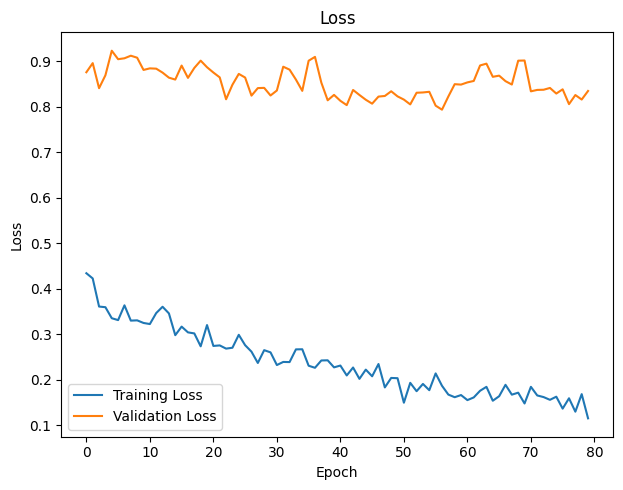

In [54]:
# Plotting Accuracy and Loss
# Plotting Accuracy and Loss
tr_ls = history.history['loss']
val_ls = history.history['val_loss']
tr_acc = history.history.get('sparse_categorical_accuracy', [])
val_acc = history.history.get('val_sparse_categorical_accuracy', [])


# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(tr_ls, label='Training Loss')
plt.plot(val_ls, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

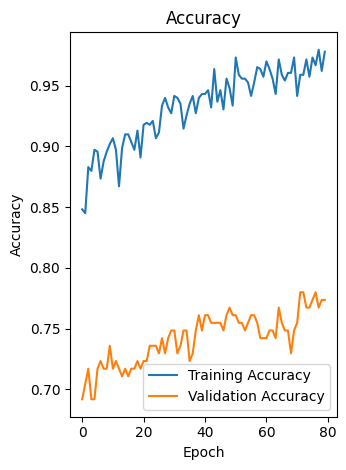

In [55]:
# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(tr_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step


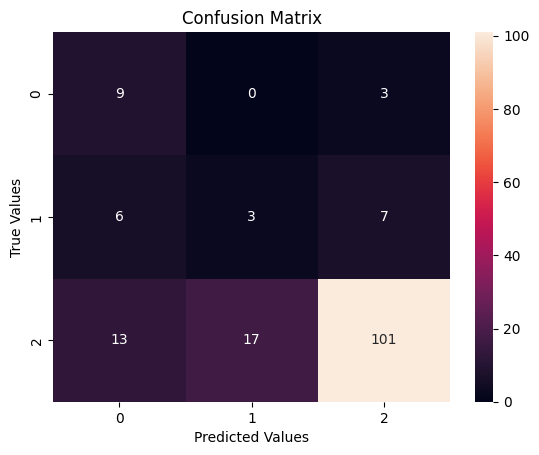

In [44]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(ts_dt)
y_pred_classes = y_pred.argmax(axis=1)

conf_mtx = confusion_matrix(y_true=yts, y_pred=y_pred_classes)
sns.heatmap(conf_mtx,fmt='d', annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()